In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ECG_10s_2500.csv')
print(df.head())

          0         1         2         3         4         5         6  \
0  0.000253  0.000137  0.000029 -0.000049  0.000003  0.000104  0.000218   
1 -0.002120 -0.002321 -0.002494 -0.002581 -0.002604 -0.002579 -0.002478   
2 -0.000140 -0.000134 -0.000083  0.000044  0.000428  0.000807  0.001260   
3 -0.001413 -0.001567 -0.001539 -0.001662 -0.001679 -0.001672 -0.001582   
4 -0.000645 -0.000753 -0.000781 -0.000851 -0.000889 -0.000837 -0.000850   

          7         8         9  ...      2495      2496      2497      2498  \
0  0.000259  0.000381  0.000554  ... -0.001424 -0.001693 -0.001745 -0.001858   
1 -0.002557 -0.002519 -0.002492  ... -0.000332 -0.000331 -0.000265 -0.000135   
2  0.001525  0.001485  0.001241  ... -0.001994 -0.001875 -0.001705 -0.001598   
3 -0.001538 -0.001463 -0.001292  ... -0.000607 -0.000543 -0.000557 -0.000511   
4 -0.000712 -0.000671 -0.000657  ... -0.004922 -0.003484 -0.002461 -0.001812   

       2499  label  patient_id  day  count  glucose_values  
0 -0.00

In [5]:
#  count total label 1 and 0
total_label_counts = df['label'].value_counts()
print(total_label_counts)

label
0    43169
1     2461
Name: count, dtype: int64


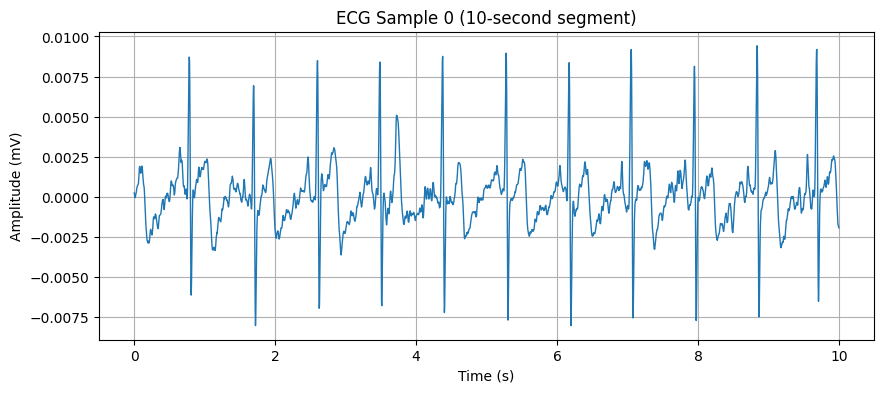

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

signal_df = df.drop(columns=['label', 'patient_id', 'day', 'count', 'glucose_values'], errors='ignore')
ecg_data = signal_df.values

sampling_rate = 250

sample_idx = 0
if sample_idx < 0 or sample_idx >= ecg_data.shape[0]:
	raise IndexError(f"sample_idx {sample_idx} is out of range (0..{ecg_data.shape[0]-1})")

signal = ecg_data[sample_idx]

time = np.arange(signal.size) / sampling_rate
plt.figure(figsize=(10, 4))
plt.plot(time, signal, linewidth=1)
plt.title(f"ECG Sample {sample_idx} (10-second segment)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.grid(True)
plt.show()


In [13]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2495', '2496', '2497', '2498', '2499', 'label', 'patient_id', 'day',
       'count', 'glucose_values'],
      dtype='object', length=2505)

0.009423938
0.016512817
0.010027601
0.009949834
0.009697197
0.014322698
0.010177729
0.01484613
0.010898855
0.022085609
0.010735584
0.044233456
0.010914099
0.01134734
0.010383434
0.012346907
0.011697545
0.01620989
0.012359157
0.012406907
0.011981482
0.011811971
0.011750853
0.011738055
0.011522213
0.014477154
0.012696581
0.014625927
0.012243642
0.013184394
0.01174363
0.015420073
0.012404181
0.014261193
0.013833176
0.016408922
0.016040314
0.011285695
0.015299707
0.014504712
0.01160329
0.014055225
0.01212544
0.010449034
0.0108046
0.015463716
0.011965028
0.010413616
0.010495544
0.017508268
0.014508858
0.012030899
0.054811843
0.010325059
0.016432252
0.017580088
0.012941093
0.013089211
0.010526822
0.012429895
0.011014898
0.010874837
0.011643571
0.0125635415
0.0131098265
0.011365648
0.011399701
0.011578846
0.011597322
0.011981743
0.011532428
0.037705883
0.014599462
0.012995062
0.0136822015
0.011641301
0.009370826
0.009902473
0.010883305
0.00917111
0.009527909
0.009740283
0.013080993
0.01115862

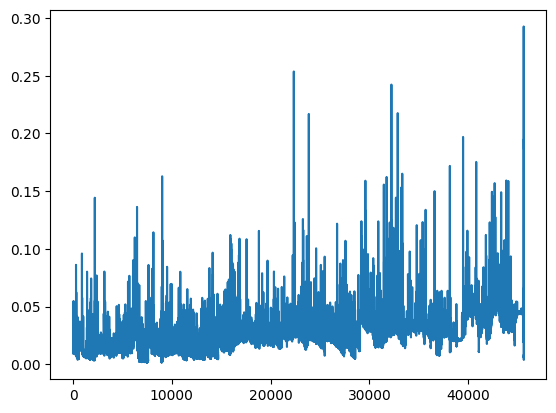

In [27]:
#plot min max of each row note that the last 5 columns are not ecg
p_max = []
for i in range(df.shape[0]):
    max = np.max(df.iloc[i,:-5])
    p_max.append(max)
    print(max)

#plot max
plt.plot(p_max)

In [19]:
label_counts = df.groupby('patient_id')['label'].value_counts()
print(label_counts)

patient_id  label
1           0          515
            1           54
2           0         4026
            1          372
3           0         1723
4           0         1968
            1          358
5           0           44
6           0         5621
7           0        14360
            1            3
8           0        14886
            1         1674
9           0           26
Name: count, dtype: int64


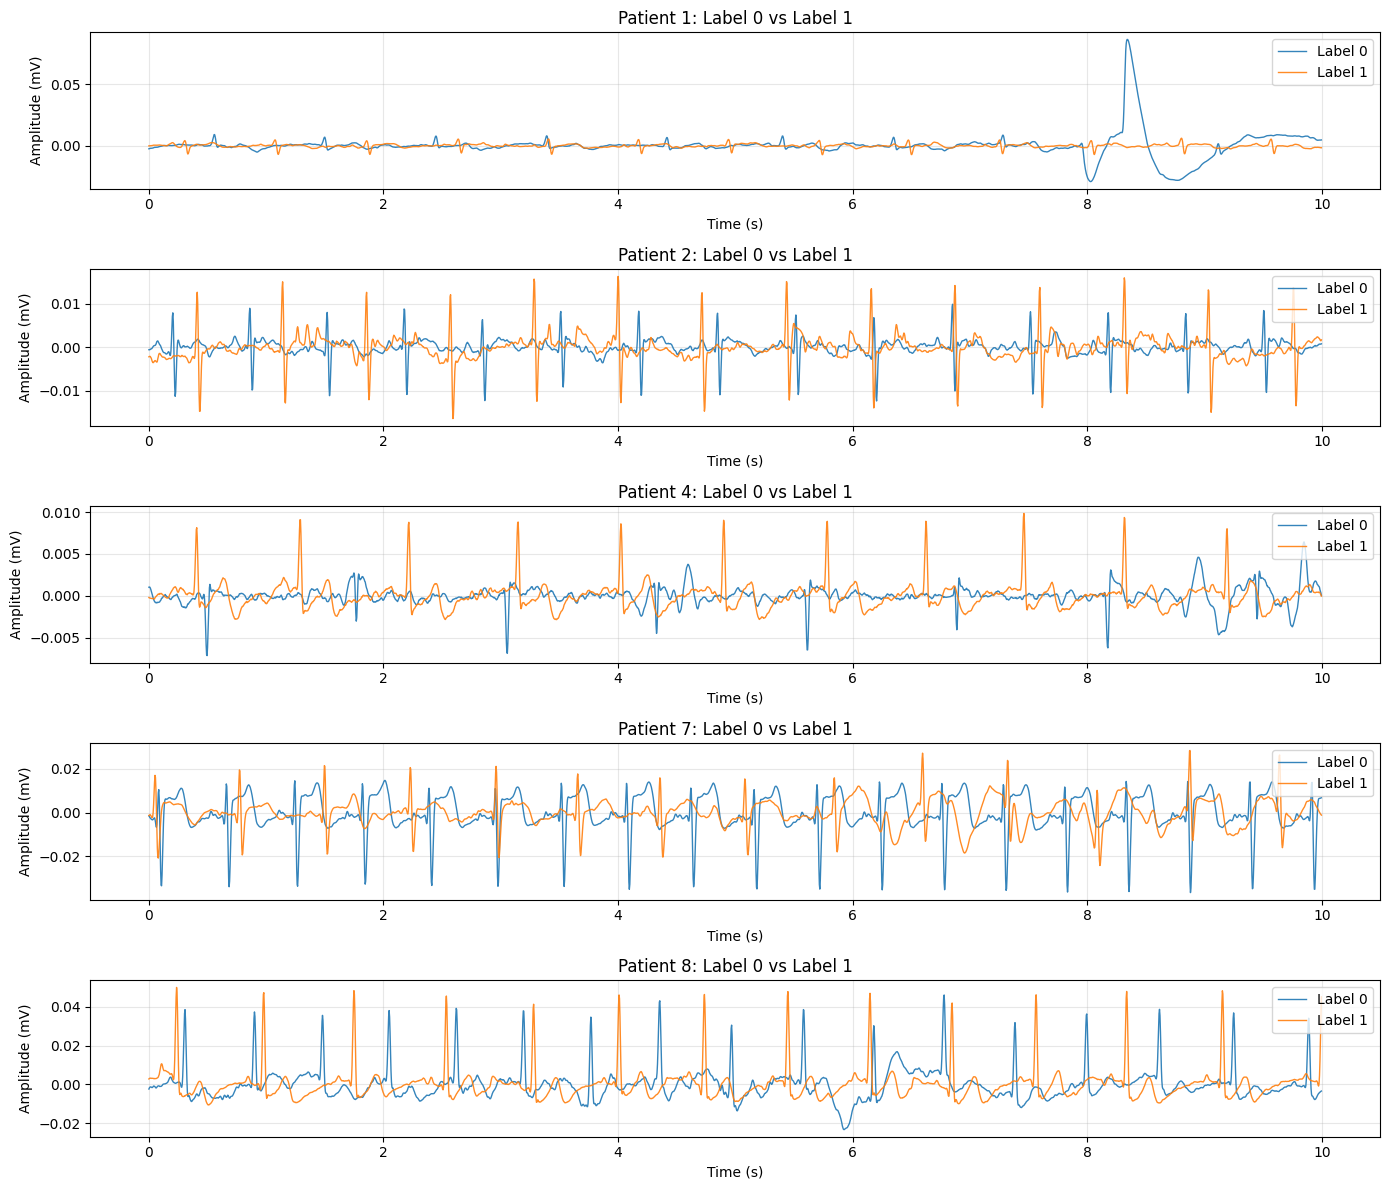

In [ ]:
patient_ids = [1, 2, 4, 7, 8]

meta_cols = ['label', 'patient_id', 'day', 'count', 'glucose_values']

signal_cols = [c for c in df.columns if c not in meta_cols]

if len(signal_cols) == 0:
    raise ValueError("No ECG signal columns found. Check column names in df.columns")

sampling_rate = 250  

fig, axes = plt.subplots(len(patient_ids), 1, figsize=(14, 12))

for idx, patient_id in enumerate(patient_ids):
    ax = axes[idx]
    
    patient_data = df[df['patient_id'] == patient_id]
    
    row0_df = patient_data[patient_data['label'] == 0]
    row1_df = patient_data[patient_data['label'] == 1]
    
    if len(row0_df) == 0 or len(row1_df) == 0:
        ax.text(0.5, 0.5, f'Patient {patient_id}: Missing label 0 or label 1 data', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Patient {patient_id} (No Data)')
        continue
    
    row0 = row0_df.sample(n=1, random_state=42+idx).reset_index(drop=True)
    row1 = row1_df.sample(n=1, random_state=100+idx).reset_index(drop=True)
    
    sig0 = row0[signal_cols].astype(float).values.flatten()
    sig1 = row1[signal_cols].astype(float).values.flatten()
    
    min_len = min(len(sig0), len(sig1))
    sig0 = sig0[:min_len]
    sig1 = sig1[:min_len]

    time = np.arange(min_len) / sampling_rate

    ax.plot(time, sig0, label='Label 0', linewidth=1, alpha=0.9)
    ax.plot(time, sig1, label='Label 1', linewidth=1, alpha=0.9)
    ax.set_title(f'Patient {patient_id}: Label 0 vs Label 1')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (mV)')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()